<a href="https://colab.research.google.com/github/A24bhi/Analyzing-Naming-Trends-Using-Python./blob/main/Analyzing_Naming_Trends_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import zipfile
from io import BytesIO

# Load the zipped dataset
with zipfile.ZipFile("/content/names.zip", "r") as z:
    # Extract file names inside the ZIP
    file_list = z.namelist()

    # Read only required files (yobYYYY.txt)
    dfs = []
    for file in file_list:  # Use file_list instead of os.listdir(path)
        if file.startswith("yob") and file.endswith(".txt"):
            year = int(file[3:7])  # Extract year from filename (yobYYYY.txt)
            with z.open(file) as f:  # Read directly from ZIP
                df = pd.read_csv(f, header=None, names=["Name", "Sex", "Count"])
                df["Year"] = year
                dfs.append(df)

# Combine all years into a single DataFrame
baby_names = pd.concat(dfs, ignore_index=True)

# Display first few rows
print(baby_names.head())


        Name Sex  Count  Year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880


In [5]:
# Check dataset info
baby_names.info()

# Check for missing values
print(baby_names.isnull().sum())

# Check unique values in 'Sex' column
print(baby_names['Sex'].unique())

# Check number of records
print(f"Total records: {len(baby_names)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 64.6+ MB
Name     0
Sex      0
Count    0
Year     0
dtype: int64
['F' 'M']
Total records: 2117219


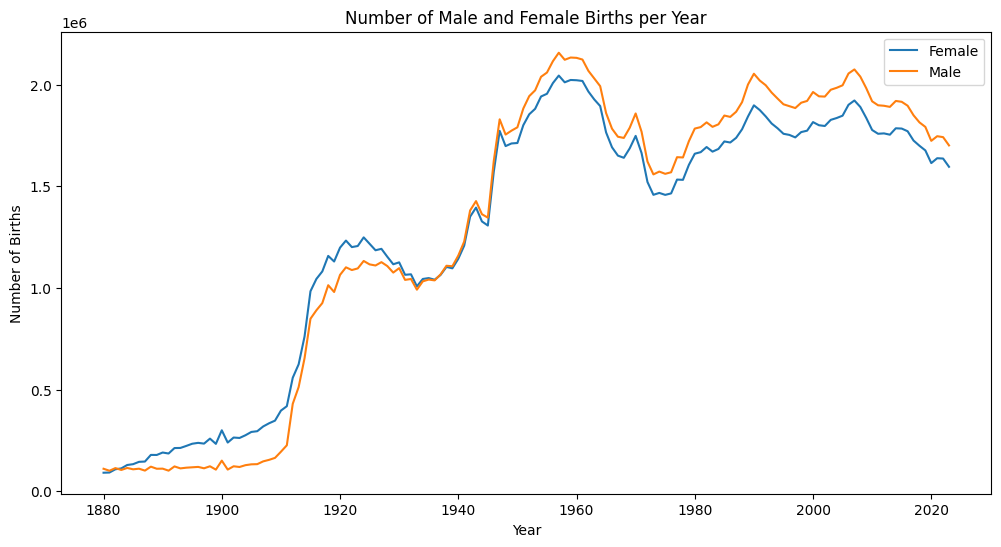

In [6]:
import matplotlib.pyplot as plt

# Group by Year and Sex, then sum the count
yearly_counts = baby_names.groupby(['Year', 'Sex'])['Count'].sum().unstack()

# Plot
yearly_counts.plot(kind='line', figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Number of Male and Female Births per Year")
plt.legend(["Female", "Male"])
plt.show()


In [7]:
top_10_names = baby_names.groupby("Name")["Count"].sum().sort_values(ascending=False).head(10)
print(top_10_names)


Name
James      5250328
John       5187975
Robert     4862085
Michael    4431942
William    4194193
Mary       4152044
David      3675136
Joseph     2665333
Richard    2583933
Charles    2435467
Name: Count, dtype: int64


In [8]:
popular_names_per_year = baby_names.loc[baby_names.groupby("Year")["Count"].idxmax()]
print(popular_names_per_year[['Year', 'Name', 'Count']])


         Year  Name  Count
942      1880  John   9655
2938     1881  John   8768
4962     1882  John   9557
7115     1883  John   8894
9317     1884  John   9388
...       ...   ...    ...
1976098  2019  Liam  20611
2007720  2020  Liam  19842
2039415  2021  Liam  20391
2071226  2022  Liam  20533
2103070  2023  Liam  20802

[144 rows x 3 columns]


In [9]:
total_counts = baby_names.groupby("Name")["Count"].sum().reset_index()

In [10]:
most_popular_name = total_counts.loc[total_counts["Count"].idxmax()]
print(most_popular_name)


Name       James
Count    5250328
Name: 41172, dtype: object


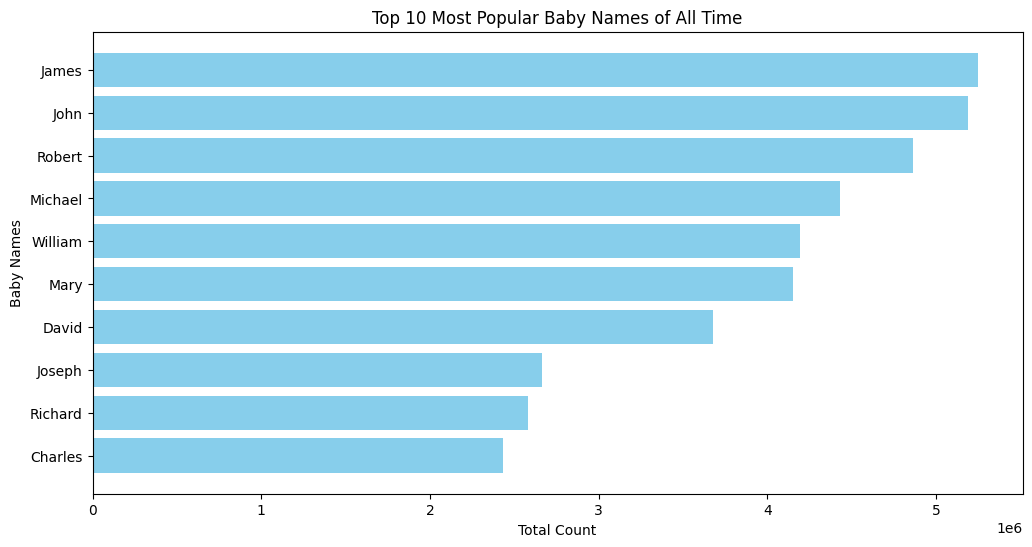

In [11]:
import matplotlib.pyplot as plt

# Step 1: Group by name and sum the count across all years
total_counts = baby_names.groupby("Name")["Count"].sum().reset_index()

# Step 2: Get the top 10 most popular names
top_10_names = total_counts.nlargest(10, "Count")

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_10_names["Name"], top_10_names["Count"], color="skyblue")
plt.xlabel("Total Count")
plt.ylabel("Baby Names")
plt.title("Top 10 Most Popular Baby Names of All Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular at the top
plt.show()


In [ ]:
################ THE END #############